In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('Blues')
#!pip install pandas==1.3.5

In [ ]:
# Asegurate que tienes la versión 1.3.5 de pandas, sino instala esa versión
pd.__version__

In [11]:
# Descargate el repositorio de github en Colab 
def is_running_in_colab():
    try:
        import google.colab
        return True
    except:
        return False
if is_running_in_colab():
    !rm -rf investigacion_senescyt
    !git clone https://github.com/mayait/investigacion_senescyt.git
    !mv /content/investigacion_senescyt/pickles_partes .

In [131]:
# Funcion que une los archivos pickle en un solo dataframe
def unir_pickle(nombre, n):
    lista_dataframes = []
    for i in range(n):
        df = pd.read_pickle(nombre + str(i) + '.pkl')
        lista_dataframes.append(df)
    df_unido = pd.concat(lista_dataframes, ignore_index=True)
    return df_unido

In [132]:
# Importa postrulaciones desde los pickles
postulaciones = unir_pickle('pickles_partes/postulaciones_',36)

# Eliminar

In [133]:
# ELIMINAR CAE_ESTADO tiene todo en 1 o activado
postulaciones.drop(['CAE_ESTADO'], axis=1, inplace=True)

In [134]:
# Elimina CAE_GRUPO, se repite con SEGMENTO_ASPIRANTE
postulaciones.drop(['CAE_GRUPO'], axis=1, inplace=True)

In [145]:
# CUS_ID	Codigo de cupos por segmentos NI IDEA
postulaciones.drop(['CUS_ID'], axis=1, inplace=True)

In [167]:
# Elimina todas las filas donde POS_ESTADO = 0
postulaciones = postulaciones[postulaciones['POS_ESTADO'] == 1]
postulaciones.drop(['POS_ESTADO'], axis=1, inplace=True)

KeyError: 'POS_ESTADO'

In [170]:
postulaciones.drop(['IES_ID'], axis=1, inplace=True)

/Users/julianmaya/opt/anaconda3/envs/tensorflow/lib/python3.10/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Limpiar año postulación

In [168]:
# 6 millones de filas no tienen fecha de postulacion :(
postulaciones['POS_FECHA_POSTULACION'].isna().count()

KeyError: 'POS_FECHA_POSTULACION'

In [169]:
# Todas las filas donde POS_ID es nulo o vacio o NAN
postulaciones[postulaciones['POS_ID'].isna()]


,Unnamed: 0,INS_ID,INI_ID,PER_ID,INS_POBLACION,INS_TIPO_INSCRIPCION,SEGMENTO_ASPIRANTE,CAE_NOTA_POSTULA,POS_ID,NOTA_POSTULA,...,PROVINCIA,CANTON,PARROQUIA,CAM_NOMBRE_CAMPUS,PRD_ID_SEGMENTO,SEGMETO_CARRERA,cod_final,archivo,ANO_POSTULACION,DIF_NOTA


In [137]:
# Extrae el año de la columna POS_FECHA_POSTULACION usando expresiones regulares, los años posibles son 2018, 2019, 2020, 2021, 2022
postulaciones['ANO_POSTULACION'] = postulaciones['POS_FECHA_POSTULACION'].str.extract(r'(\d{4})', expand=False)

# Para todos los NAN de la columna ANO_POSTULACION, extraer el año de la columna archivo con expresiones regulares
# Transformando el valor 18 a 2018, 19 a 2019, 20 a 2020, 21 a 2021, 22 a 2022
postulaciones['ANO_POSTULACION'] = postulaciones['ANO_POSTULACION'].fillna(postulaciones['archivo'].str.extract(r'(\d{2})', expand=False))
postulaciones['ANO_POSTULACION'] = postulaciones['ANO_POSTULACION'].replace({'18':2018, '19':2019, '20':2020, '21':2021, '22':2022})

# Convierte la columna a tipo numérico
postulaciones['ANO_POSTULACION'] = pd.to_numeric(postulaciones['ANO_POSTULACION'], errors='coerce')

In [138]:
postulaciones.ANO_POSTULACION.value_counts()

2021    2929312
2020    2597192
2019    1046709
2018       2743
Name: ANO_POSTULACION, dtype: int64

In [139]:
# Elimina las filas menores a 2018
postulaciones = postulaciones[postulaciones['ANO_POSTULACION'] > 2018]

In [144]:
# Elimina POS_FECHA_POSTULACION
postulaciones.drop(['POS_FECHA_POSTULACION'], axis=1, inplace=True)

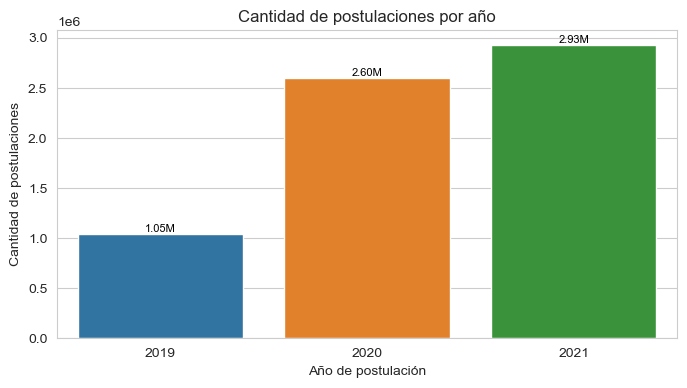

In [79]:
# Grafica la cantidad de postulantes por ano de postulación
plt.figure(figsize=(8,4))
sns.countplot(x='ANO_POSTULACION', data=postulaciones)
# cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}M'.format(p.get_height()/1000000), 
            fontsize=8, color='black', ha='center', va='bottom')
plt.title('Cantidad de postulaciones por año')
plt.xlabel('Año de postulación')
plt.ylabel('Cantidad de postulaciones')
plt.show()

# Nota de postulación

In [90]:
# Eliminar vacios en CAE_NOTA_POSTULA 
postulaciones = postulaciones[postulaciones['CAE_NOTA_POSTULA'].notna()]

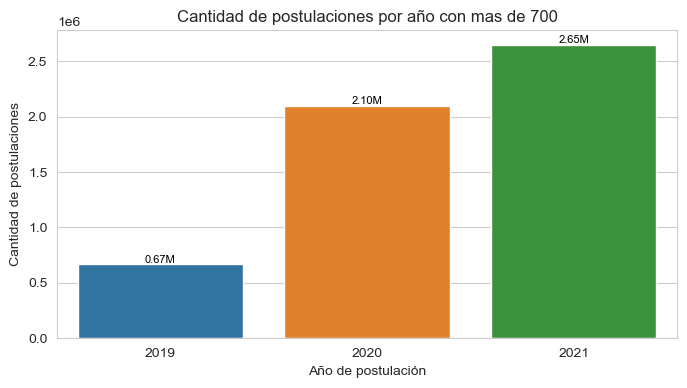

In [91]:
# Grafica la cantidad de postulantes por ano de postulación
plt.figure(figsize=(8,4))
sns.countplot(x='ANO_POSTULACION', data=postulaciones[postulaciones['CAE_NOTA_POSTULA'] > 700])
# cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}M'.format(p.get_height()/1000000), 
            fontsize=8, color='black', ha='center', va='bottom')
plt.title('Cantidad de postulaciones por año con mas de 700')
plt.xlabel('Año de postulación')
plt.ylabel('Cantidad de postulaciones')
plt.show()

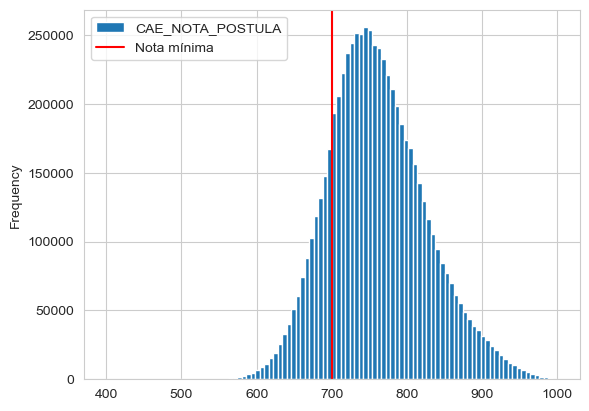

In [147]:
# grafica un histograma de la columna CAE_NOTA_POSTULA usando seaborn histplot

# Grafiquemos la distribución de los datos CAE_NOTA_POSTULA en postulaciones
postulaciones['CAE_NOTA_POSTULA'].plot.hist(bins=100)
# Pon una linea en 700 con la etiqueta nota minima
plt.axvline(700, color='red', label='Nota mínima')
plt.legend()
plt.show()

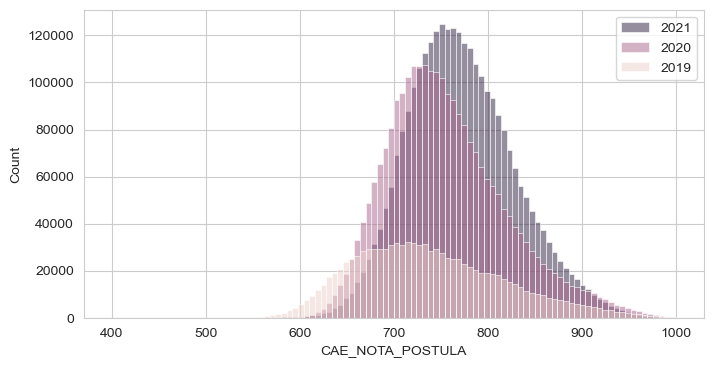

In [93]:
# Histogramas de CAE_NOTA_POSTULA por año sobrepuestos
plt.figure(figsize=(8,4))
sns.histplot(data=postulaciones, x='CAE_NOTA_POSTULA', hue='ANO_POSTULACION', bins=100)
plt.legend(labels=postulaciones['ANO_POSTULACION'].unique())
plt.show()

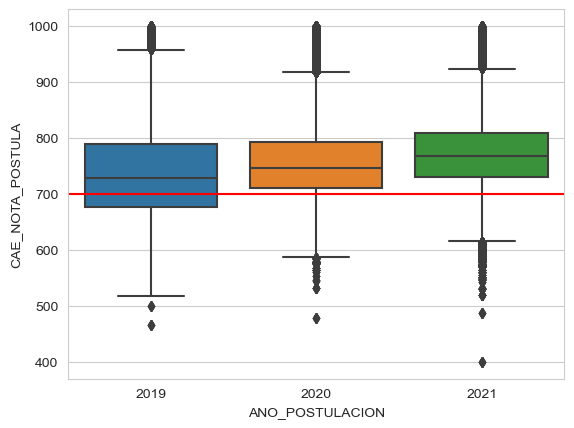

In [94]:
# Boxplot de CAE_NOTA_POSTULA por ANO_POSTULACION
sns.boxplot(x='ANO_POSTULACION', y='CAE_NOTA_POSTULA', data=postulaciones)
plt.axhline(700, color='red', label='Nota mínima')
plt.show()


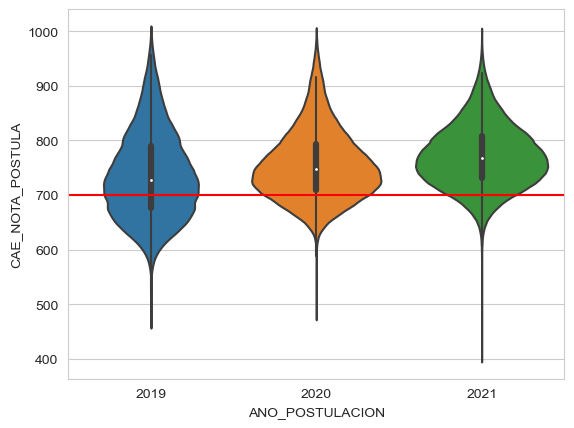

In [95]:
# Violin plot de CAE_NOTA_POSTULA por ANO_POSTULACION
sns.violinplot(x='ANO_POSTULACION', y='CAE_NOTA_POSTULA', data=postulaciones)
plt.axhline(700, color='red', label='Nota mínima')
plt.show()

In [151]:
# Todo lo que sea diferente de POBLACION GENERAL en SEGMENTO_ASPIRANTE lo convierto en ACCION AFIRMATIVA
postulaciones['SEGMENTO_ASPIRANTE'] = postulaciones['SEGMENTO_ASPIRANTE'].replace(
    {'POBLACION GENERAL': 'POBLACION GENERAL', 
     'GAR': 'ACCION AFIRMATIVA',
     'IES PARTICULAR': 'ACCION AFIRMATIVA',
     'MERITO TERRITORIAL': 'ACCION AFIRMATIVA',
     'POLITICA DE ACCION AFIRMATIVA': 'ACCION AFIRMATIVA'})
postulaciones['SEGMENTO_ASPIRANTE'].value_counts()

POBLACION GENERAL    4006717
ACCION AFIRMATIVA    2551677
Name: SEGMENTO_ASPIRANTE, dtype: int64

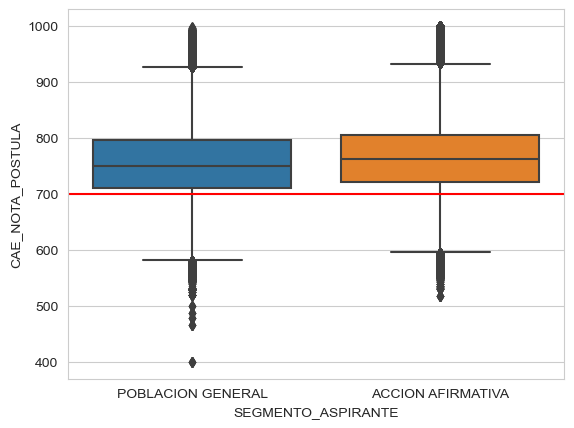

In [152]:
# Boxplot de CAE_NOTA_POSTULA por SEGMENTO_ASPIRANTE
sns.boxplot(x='SEGMENTO_ASPIRANTE', y='CAE_NOTA_POSTULA', data=postulaciones)
plt.axhline(700, color='red', label='Nota mínima')
plt.show()



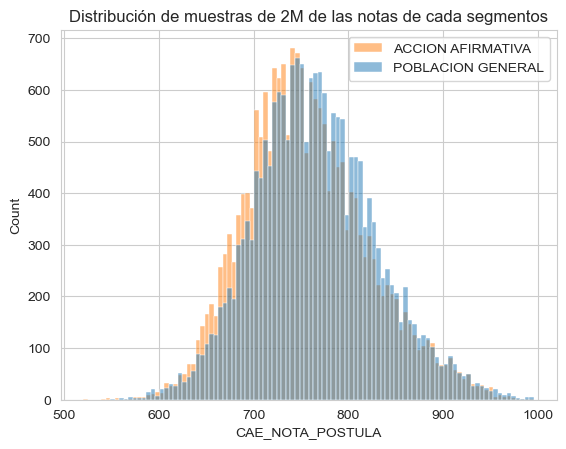

In [155]:
# Existe una diferencia significativa entre las notas de los segmentos de población?

# Tomo una muestra de 10000 de cada segmento
sample = postulaciones.groupby('SEGMENTO_ASPIRANTE').apply(lambda x: x.sample(20000))
# titulo del grafico
plt.title('Distribución de muestras de 2M de las notas de cada segmentos')
# Grafico la distribución de las notas de cada segmento
sns.histplot(data=sample, x='CAE_NOTA_POSTULA', hue='SEGMENTO_ASPIRANTE', bins=100)
plt.legend(labels=sample['SEGMENTO_ASPIRANTE'].unique())
plt.show()

## NOTA_POSTULA o CAE_NOTA_POSTULA
¿Nos quedamos con quien?
- **CAE_NOTA_POSTULA** nota mayor del ENES de los 3 últimos periodos incluido el actual / A partir del P17 almacena la Nota de postulación=CAE_NOTASB_MAS_ACCAFIRMATIVA, si la nota CAE_NOTASB_MAS_ACCAFIRMATIVA sobrepasa los 1000 puntos la nota de postulación será 1000 / A partir del p18 guarda nota ponderada SB y grado mas acciones afirmativas
- **NOTA_POSTULA** Nivel en el que se aceptó el cupo

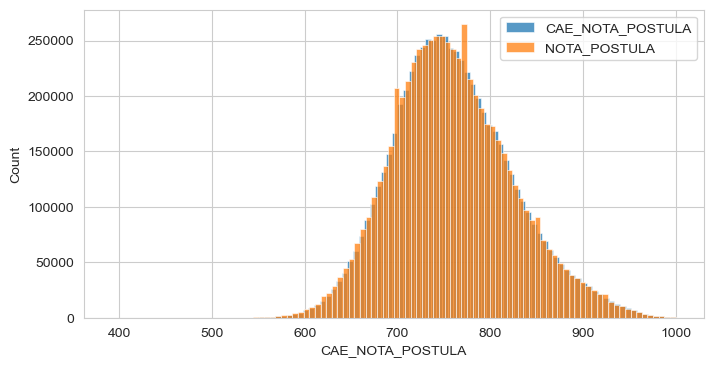

In [157]:
# Compara NOTA_POSTULA con CAE_NOTA_POSTULA en un mismo histograma
plt.figure(figsize=(8,4))
sns.histplot(data=postulaciones, x='CAE_NOTA_POSTULA', bins=100, label='CAE_NOTA_POSTULA')
sns.histplot(data=postulaciones, x='NOTA_POSTULA', bins=100, label='NOTA_POSTULA')
plt.legend()
plt.show()


In [159]:
# Calcula la diferencia entre las notas de CAE_NOTA_POSTULA y NOTA_POSTULA
postulaciones['DIF_NOTA'] = postulaciones['CAE_NOTA_POSTULA'] - postulaciones['NOTA_POSTULA']
# Grafica la diferencia de notas
postulaciones['DIF_NOTA'].describe()

count    6.558394e+06
mean     4.346390e-01
std      7.257582e+00
min     -1.380000e+02
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.660000e+02
Name: DIF_NOTA, dtype: float64

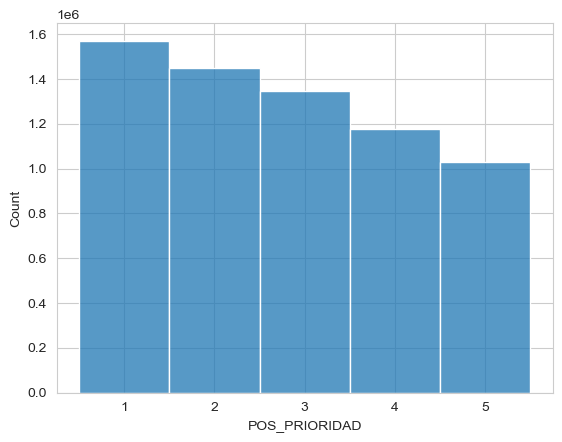

In [163]:
# Convertir POS_PRIORIDAD a categorica
postulaciones['POS_PRIORIDAD'] = postulaciones['POS_PRIORIDAD'].astype('category')
# Histograma de POS_PRIORIDAD
sns.histplot(data=postulaciones, x='POS_PRIORIDAD', bins=5)
plt.show()


In [165]:
# Describe de CAE_NOTA_POSTULA por POS_PRIORIDAD
# ¿Quien tiene más prioridad?
postulaciones.groupby('POS_PRIORIDAD')['CAE_NOTA_POSTULA'].describe()

,count,mean,std,min,25%,50%,75%,max
POS_PRIORIDAD,,,,,,,,
1,1555952.0,762.223229,66.292217,400.0,716.0,757.0,804.0,1000.0
2,1449702.0,761.380738,65.538509,400.0,716.0,756.0,803.0,1000.0
3,1344376.0,759.914242,64.812948,400.0,715.0,755.0,801.0,1000.0
4,1177104.0,758.114373,64.408961,400.0,714.0,753.0,799.0,1000.0
5,1031260.0,756.458995,63.732126,400.0,713.0,751.0,796.0,1000.0


In [172]:
postulaciones.IES_NOMBRE_INSTIT.value_counts()

UNIVERSIDAD DE GUAYAQUIL                                  1274371
UNIVERSIDAD CENTRAL DEL ECUADOR                            858846
UNIVERSIDAD ESTATAL DE MILAGRO                             578553
UNIVERSIDAD TECNICA DE MANABI                              421269
UNIVERSIDAD DE LAS FUERZAS ARMADAS (ESPE)                  312100
                                                           ...   
INSTITUTO TECNOLÓGICO DE IMAGEN Y SONIDO PARADOX               13
INSTITUTO TECNOLÓGICO SUPERIOR KEVIN                           13
INSTITUTO TECNOLÓGICO SUPERIOR ESCULAPIO                       12
INSTITUTO TECNOLÓGICO SUPERIOR CUEST TV                         9
INSTITUTO TECNOLÓGICO SUPERIOR BENJAMÍN ROSALES PAREJA          6
Name: IES_NOMBRE_INSTIT, Length: 245, dtype: int64

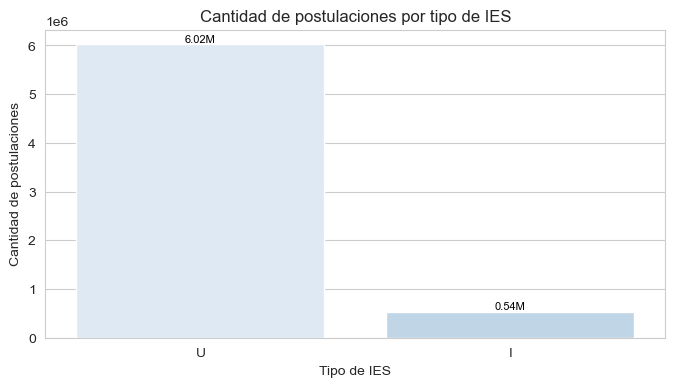

In [223]:
# Grafica la cantidad de postulaciones por IES_TIPO_IES
plt.figure(figsize=(8,4))
sns.countplot(x='IES_TIPO_IES', data=postulaciones)
# cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}M'.format(p.get_height()/1000000), 
            fontsize=8, color='black', ha='center', va='bottom')
plt.title('Cantidad de postulaciones por tipo de IES')
plt.xlabel('Tipo de IES')
plt.ylabel('Cantidad de postulaciones')
plt.show()

In [225]:
# Grafica el promedio de CAE_NOTA_POSTULA por IES_TIPO_IES
plt.figure(figsize=(8,4))
sns.barplot(x='IES_TIPO_IES', y='CAE_NOTA_POSTULA', data=postulaciones)
plt.title('Promedio de notas por tipo de IES')
plt.xlabel('Tipo de IES')
plt.ylabel('CAE_NOTA_POSTULA')
plt.show()

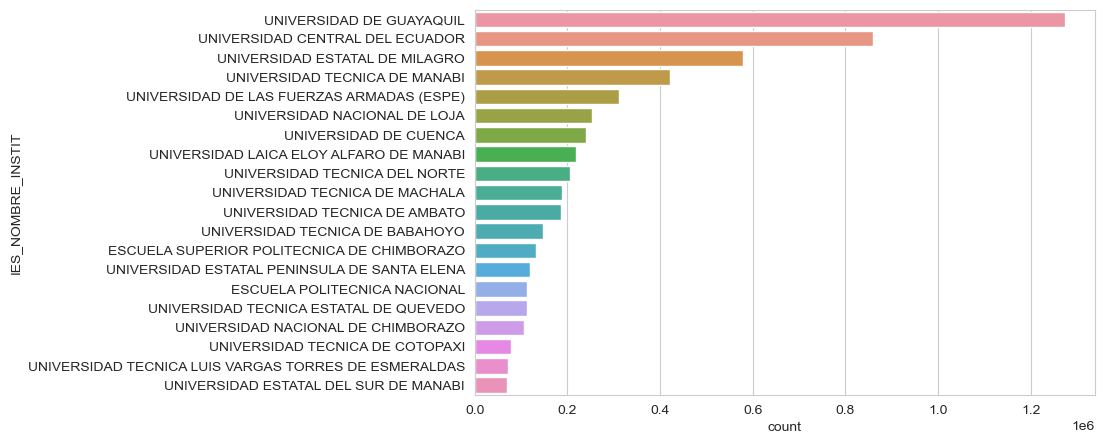

In [176]:
# Grafica la cantidad de postulaciones por IES_NOMBRE_INSTIT, top 20
plt.figure(figsize=(8,5))
sns.countplot(y='IES_NOMBRE_INSTIT', data=postulaciones, order=postulaciones['IES_NOMBRE_INSTIT'].value_counts().iloc[:20].index)
plt.show()

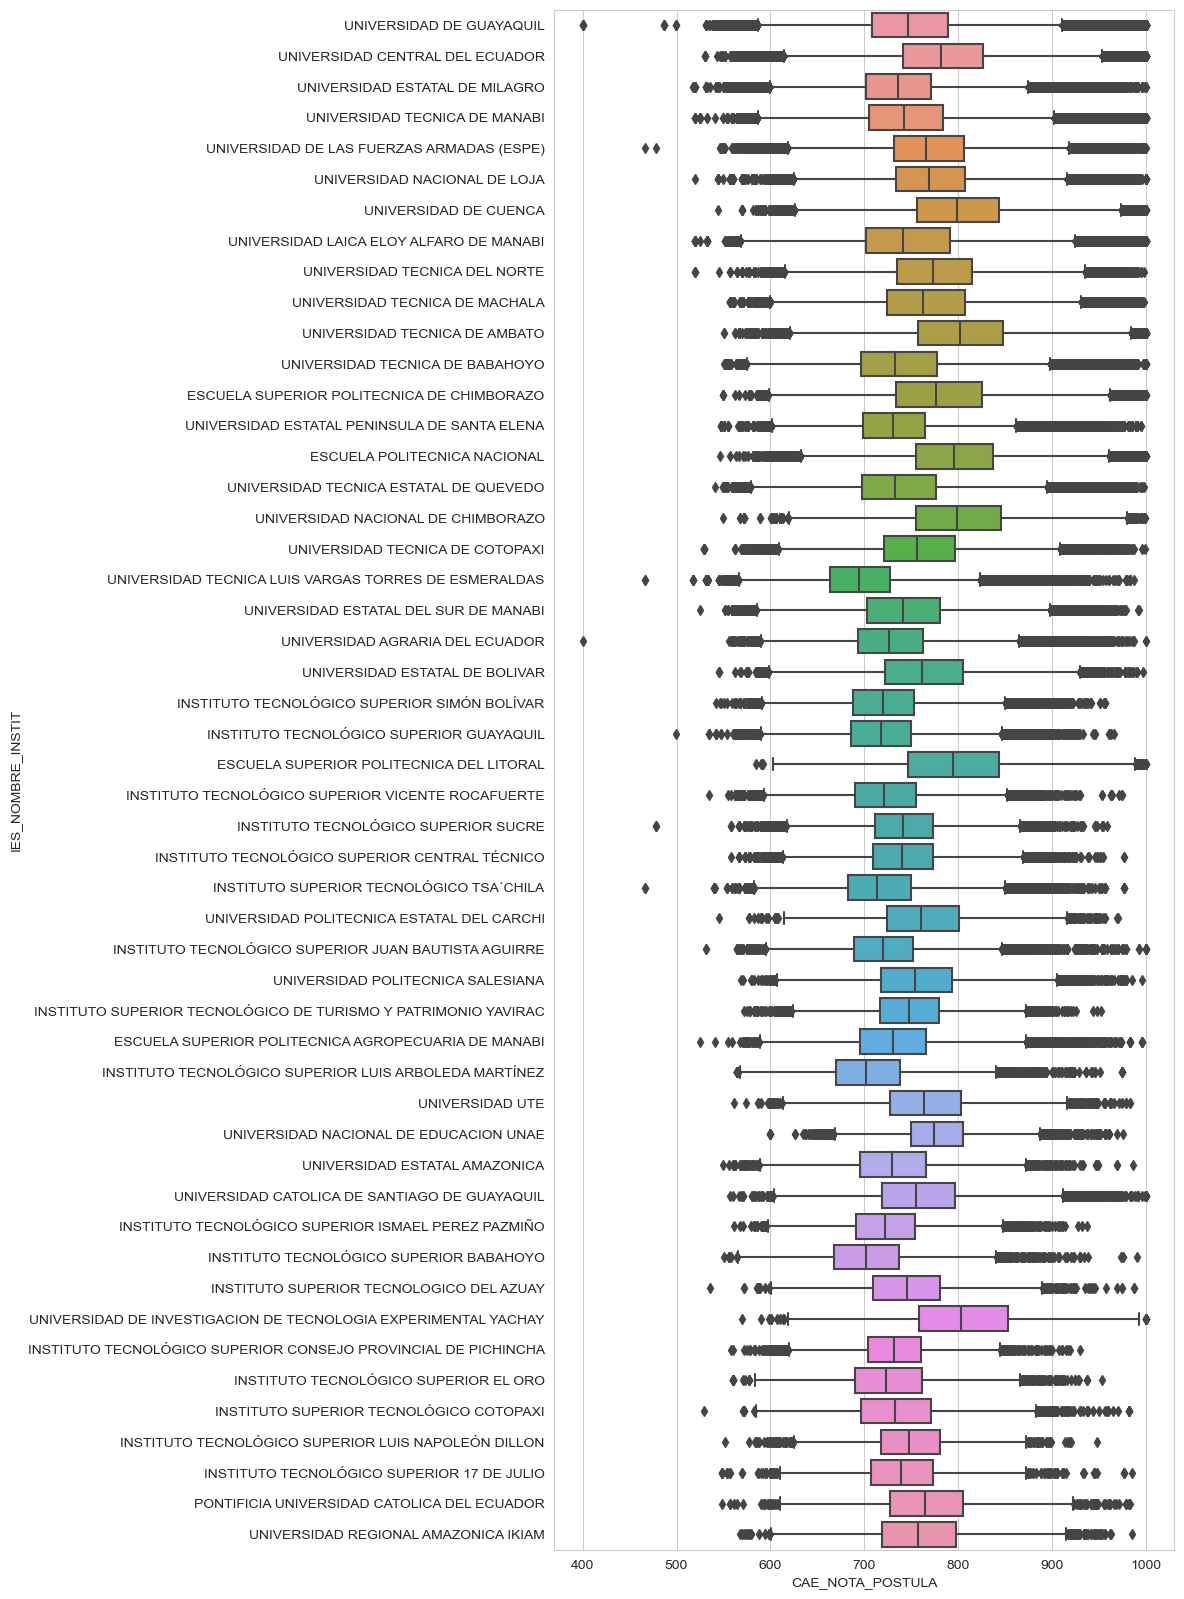

In [189]:
# Garfica un boxplot de CAE_NOTA_POSTULA por IES_NOMBRE_INSTIT, top 10
plt.figure(figsize=(8,20))
sns.boxplot(y='IES_NOMBRE_INSTIT', x='CAE_NOTA_POSTULA', data=postulaciones, order=postulaciones['IES_NOMBRE_INSTIT'].value_counts().iloc[:50].index)
plt.show()


In [208]:
# Tabla de las universidades con las postulaciones y describe de CAE_NOTA_POSTULA
universidades = postulaciones.groupby('IES_NOMBRE_INSTIT')['CAE_NOTA_POSTULA'].describe()
# count_percent es el porcentaje de postulaciones por universidad
universidades['count_percent'] = universidades['count'] / universidades['count'].sum() * 100
# Ordena las universidades por la cantidad de postulaciones
universidades = universidades.sort_values(by='count', ascending=False)
universidades


,count,mean,std,min,25%,50%,75%,max,count_percent
IES_NOMBRE_INSTIT,,,,,,,,,
UNIVERSIDAD DE GUAYAQUIL,1274371.0,751.659908,63.448122,400.0,708.00,746.0,789.00,1000.0,19.431678
UNIVERSIDAD CENTRAL DEL ECUADOR,858846.0,784.387761,62.983749,530.0,741.00,782.0,826.00,1000.0,13.095730
UNIVERSIDAD ESTATAL DE MILAGRO,578553.0,738.040017,54.189870,518.0,702.00,736.0,771.00,1000.0,8.821807
UNIVERSIDAD TECNICA DE MANABI,421269.0,747.932765,64.328925,520.0,705.00,742.0,784.00,1000.0,6.423532
UNIVERSIDAD DE LAS FUERZAS ARMADAS (ESPE),312100.0,769.540099,57.038529,466.0,731.00,766.0,806.00,1000.0,4.758918
...,...,...,...,...,...,...,...,...,...
INSTITUTO TECNOLÓGICO SUPERIOR KEVIN,13.0,740.230769,64.848739,636.0,687.00,749.0,780.00,847.0,0.000198
INSTITUTO TECNOLÓGICO DE IMAGEN Y SONIDO PARADOX,13.0,715.230769,34.890672,671.0,688.00,695.0,746.00,778.0,0.000198
INSTITUTO TECNOLÓGICO SUPERIOR ESCULAPIO,12.0,745.416667,72.000579,606.0,711.25,738.0,791.25,882.0,0.000183


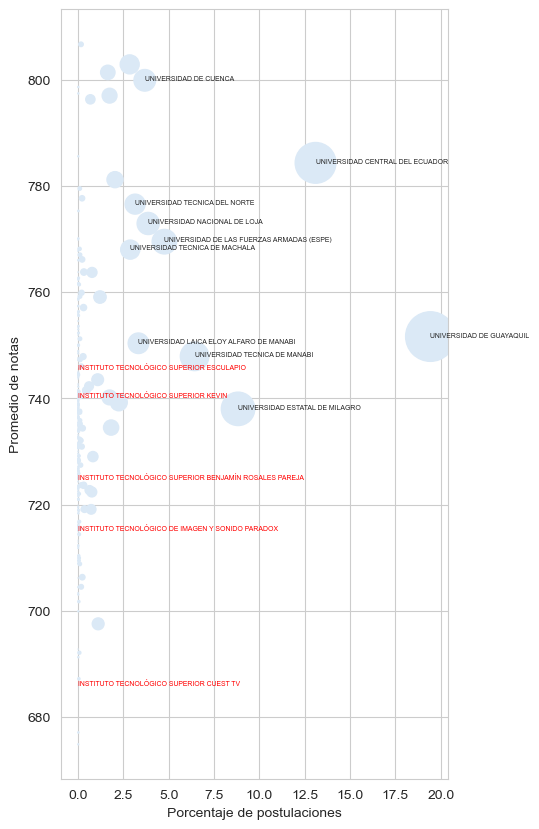

In [222]:
# Scatter plot de count_percent y mean, con el tamaño de los puntos proporcional a la cantidad de postulaciones
plt.figure(figsize=(5,10))
plt.scatter(universidades['count_percent'], universidades['mean'], s=universidades['count']/1000)
plt.xlabel('Porcentaje de postulaciones')
plt.ylabel('Promedio de notas')

for i in universidades.index[:10]:
    plt.text(universidades.loc[i, 'count_percent'], universidades.loc[i, 'mean'], i, fontsize=5)

# en color rojo las 5 universidades con menos postulaciones
for i in universidades.index[-5:]:
    plt.text(universidades.loc[i, 'count_percent'], universidades.loc[i, 'mean'], i, fontsize=5, color='red')


plt.show()


